#**Criando gráficos customizados**

##**Entendendo o contexto**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_jogos.csv')

Os dados, disponibilizados no [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales/data) em 2008, referem-se à indústria de jogos e incluem informações detalhadas sobre títulos, gêneros, desenvolvedores e vendas (em milhões de dólares):

In [3]:
df.head()

,classificacao,nome,plataforma,ano,genero,desenvolvedor,vendas_america_norte,vendas_europa,vendas_japao,outras_vendas,vendas_globais
0,1,Wii Sports,Wii,2006.0,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37


> 👩‍💻***Dica da Val:*** Antes de criar um gráfico, reflita: Quem é o seu público? O que você deseja que ele compreenda ou faça com a informação apresentada? Essas perguntas ajudam a determinar não apenas o tipo de gráfico mais adequado, mas também a melhor forma de apresentar os dados, como destacar pontos importantes e simplificar informações complexas.

**Público:** Desenvolvedores de Jogos

* **Objetivo:** Informar quais gêneros têm maior aceitação no mercado japonês para orientar o desenvolvimento de novos jogos.

* **Foco do gráfico:** Evidenciar as categorias de jogos que têm gerado mais receita, oferecendo insights para decisões estratégicas de desenvolvimento e alocação de recursos.

Para isso, vamos **agrupar os dados pelo gênero de jogos e calcular o total de faturamento no Japão para cada categoria**. Para tornar a análise mais intuitiva, podemos ordenar os resultados do maior para o menor valor, destacando os gêneros mais lucrativos.

Além disso, ao utilizar o método `reset_index()`, reorganizamos o DataFrame para que os índices sejam redefinidos. Isso facilita o acesso e manipulação dos dados agrupados, permitindo realizar operações adicionais ou gerar visualizações com mais facilidade:

In [4]:
vendas_genero_japao = df.groupby('genero')['vendas_japao'].sum().sort_values(ascending=False).reset_index()
vendas_genero_japao

,genero,vendas_japao
0,RPG,352.31
1,Ação,159.95
2,Esportes,135.37
3,Plataforma,130.77
4,Diversos,107.76
5,Luta,87.35
6,Simulação,63.70
7,Quebra-cabeça,57.31
8,Corrida,56.69
9,Aventura,52.07


##**Escolhendo uma apresentação visual adequada**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

**Qual é a melhor maneira de mostrar os dados que você deseja comunicar?**

Para comparar diferentes categorias de forma clara e organizada, um gráfico de colunas é uma excelente escolha. Ele permite visualizar as diferenças entre os grupos de maneira intuitiva, destacando rapidamente quais categorias possuem valores mais altos ou mais baixos:

<Axes: xlabel='genero', ylabel='vendas_japao'>

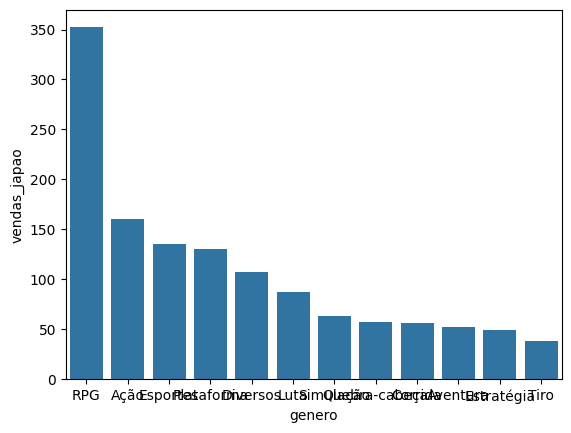

In [6]:
sns.barplot(x='genero', y='vendas_japao', data=vendas_genero_japao)

> 👩‍💻***Dica da Val:*** No entanto, quando temos muitas categorias, a visualização em um gráfico de colunas pode ficar comprometida, especialmente se os rótulos das categorias forem longos ou se houver pouco espaço disponível. Para resolver esse problema, podemos alterar a orientação do gráfico para horizontal, utilizando um gráfico de barras. Isso facilita a leitura dos rótulos e mantém as informações organizadas, garantindo uma apresentação mais clara e acessível.

###**Mudando a orientação do gráfico**

<Axes: xlabel='vendas_japao', ylabel='genero'>

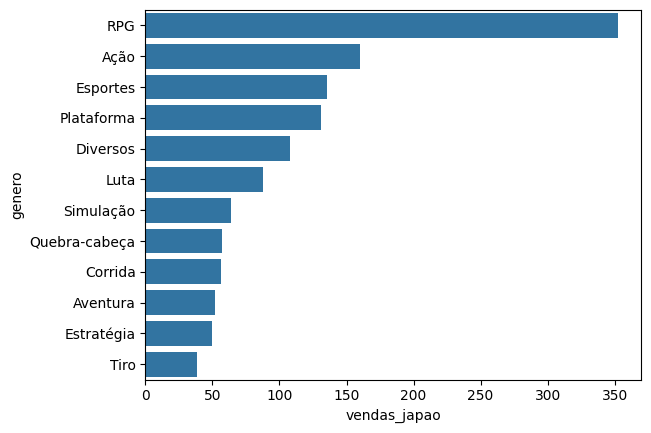

In [7]:
sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao)

> ***👩‍💻Dica da Val:*** Um aspecto muito interessante do gráfico de barras é que ele aproveita a forma como processamos informações visuais. Normalmente, nossos olhos percorrem a tela seguindo um padrão em "Z", começando no canto superior esquerdo e descendo em diagonal para a direita. Esse fluxo visual faz com que nossos olhos alcancem primeiro os nomes das categorias antes de chegar aos dados correspondentes. Isso torna a interpretação mais intuitiva, pois ao visualizar as barras, já sabemos exatamente a qual categoria elas pertencem.

###**Tornando a visualização mais informativa**

Para customizar o gráfico, criamos dois objetos:

* `fig`: controla o layout geral da figura, incluindo o tamanho e o espaço disponível para o gráfico. No exemplo, especificamos o tamanho da figura com `figsize=(8,5)` e ajustamos o layout com `fig.subplots_adjust(right=0.7)` para criar mais espaço na lateral direita da figura.

* `ax`: manipula o gráfico propriamente dito, permitindo adicionar ou ajustar detalhes específicos. No exemplo, o gráfico de barras é gerado com o Seaborn e associado ao objeto `ax`. A partir disso, personalizamos diversos aspectos:

  * O título é adicionado com `ax.set_title()`, especificando texto, posição, tamanho da fonte e espaçamento.
  * Os rótulos dos eixos X e Y são ocultados com `ax.set_xlabel('')` e `ax.set_ylabel('')`.
  * Os tamanhos das legendas nos eixos são ajustados com `ax.yaxis.set_tick_params(labelsize=12)` para melhor legibilidade.

Por fim, o comando `plt.show()` exibe o gráfico:

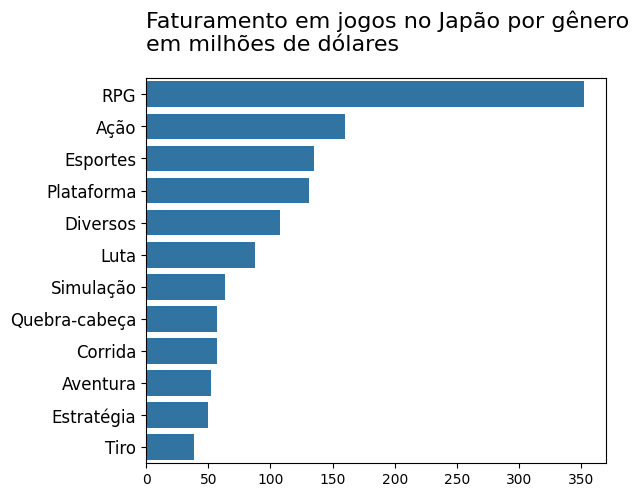

In [8]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

##**Eliminando a saturação**

> 👩‍💻***Dica da Val:*** Excesso de informações em um gráfico pode causar sobrecarga cognitiva, ou seja, exigir mais esforço do cérebro para interpretar os dados, o que pode dificultar a compreensão. Para evitar isso, é importante remover qualquer elemento que não acrescente valor informativo à visualização. Simplificar o gráfico, destacando apenas os aspectos relevantes, torna a comunicação mais clara e eficaz, ajudando o público a focar no que realmente importa.

###**Removendo o contorno do gráfico**

Para remover o contorno do gráfico, usamos o `ax.set_frame_on(False)`:

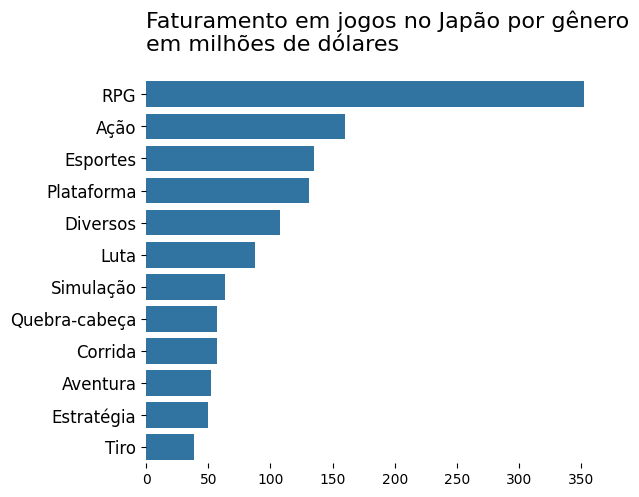

In [9]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

plt.show()

###**Removendo o eixo x**

Para remover o eixo x, usamos o `ax.get_xaxis().set_visible(False)`:

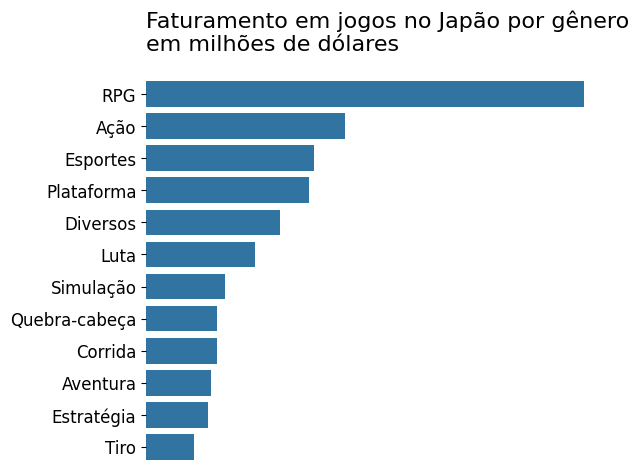

In [10]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False)

plt.show()

###**Removendo os ticks**

Por fim, para remover os ticks, usamos o `ax.tick_params(length=0)`:

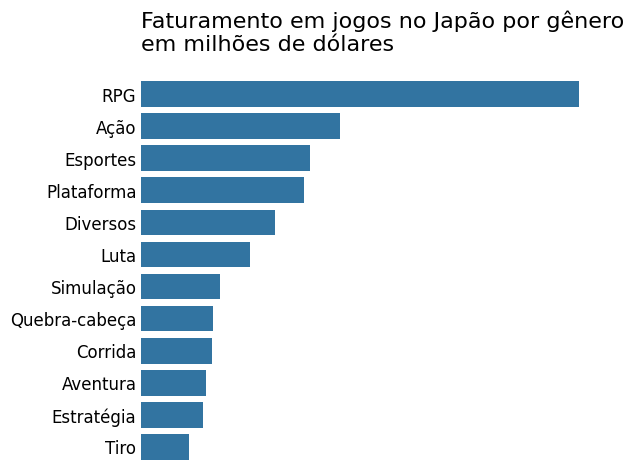

In [11]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False)

# Removendo os ticks
ax.tick_params(length=0)

plt.show()

##**Focando a atenção onde você deseja**

###**Customizando as cores**

> 👩‍💻***Dica da Val:*** É possível utilizar paletas de cores pré-definidas tanto do [Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html) quanto do [Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html), o que proporciona praticidade. No entanto, você também tem a flexibilidade de criar suas próprias paletas personalizadas para atender às necessidades específicas do seu projeto. Isso pode ser feito utilizando [códigos de cores](https://g.co/kgs/MmNP2ns), como os formatos hexadecimal ou RGB, permitindo que você ajuste as cores para combinar com identidades visuais ou destacar informações importantes de forma única.

|Azul|||||
|------|------|------|------|------|
| AZUL1 |AZUL2 |AZUL3 |AZUL4 |AZUL5 |
|#03045e | #0077b6 | #00b4d8| #90e0ef | #CDDBF3 |
|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL1.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL2.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL3.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL4.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL5.png?raw=true)|

&nbsp;

|Cinza|||||
|------|------|------|------|------|
| CINZA1 |CINZA2 |CINZA3 |CINZA4 |CINZA5|
|#212529 | #495057| #adb5bd | #dee2e6| #f8f9fa |
| ![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA1.png?raw=true)  |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA2.png?raw=true) |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA3.png?raw=true) |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA4.png?raw=true) |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA5.png?raw=true)|
&nbsp;

In [12]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'

Para adicionar cores ao gráfico, podemos criar uma lista personalizada baseada em uma condição específica, como destacar o valor máximo. Essa lista define as cores que serão aplicadas aos elementos do gráfico com base nos critérios estabelecidos. Em seguida, basta utilizar os parâmetros `hue` e `palette` na função de criação do gráfico para aplicar as cores.

O parâmetro `hue` é usado para adicionar uma dimensão extra ao gráfico, separando os dados em categorias distintas e atribuindo cores diferentes para cada uma delas:

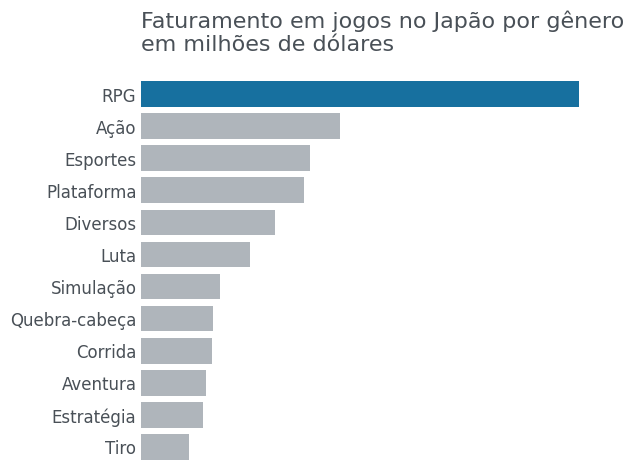

In [ ]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Definindo as cores do gráfico
cores = [AZUL2 if vendas == vendas_genero_japao['vendas_japao'].max()
         else CINZA3 for vendas in vendas_genero_japao['vendas_japao']]

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao, hue='genero', palette=cores)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, color=CINZA2, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False)

# Removendo os ticks
ax.tick_params(length=0)

plt.show()

###**Adicionando os valores das barras**

Podemos incluir os valores de cada barra diretamente no gráfico para facilitar a leitura e interpretação dos dados. Isso é feito utilizando o método `ax.text()`, que posiciona o texto em coordenadas específicas dentro do gráfico.

No código abaixo, iteramos sobre os valores de `vendas_japao` e, para cada barra, formatamos o valor como moeda e sem casas decimais (usando `f'${valor:.0f}'`).

Em seguida, ajustamos a posição do texto, adicionando um pequeno `offset` para garantir que o valor não fique colado na barra. Quanto maior o valor do `offset`mais para esquerda a anotação ficará.

O parâmetro `ha='right'` alinha o texto à direita, enquanto `va='center'` centraliza o texto em relação à barra. Esses ajustes ajudam a posicionar o valor de forma clara e legível, sem sobrecarregar a visualização:

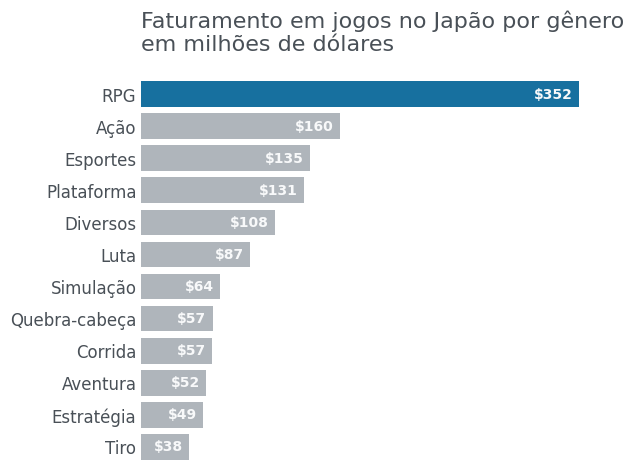

In [14]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Definindo as cores do gráfico
cores = [AZUL2 if vendas == vendas_genero_japao['vendas_japao'].max()
         else CINZA3 for vendas in vendas_genero_japao['vendas_japao']]

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao, hue='genero', palette=cores)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, color=CINZA2, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False)

# Removendo os ticks
ax.tick_params(length=0)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(vendas_genero_japao['vendas_japao']):
  qtd = f'${valor:.0f}' # Formatação para mostrar o valor inteiro com o símbolo de dólar
  offset = 5 # Deslocamento para evitar que o texto se sobreponha à barra
  ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

plt.show()

###**Adicionando textos**

Por fim, podemos adicionar uma anotação de conclusão diretamente no gráfico usando a função `ax.text()`. A anotação contém um texto explicativo sobre o gráfico, que destaca a liderança do gênero RPG no faturamento no Japão, informando que alcançou 352 milhões de dólares.

O texto é formatado para melhorar a legibilidade e a estética, com a utilização de negrito em algumas partes (como "RPG", "Japão", e "352 milhões de dólares") e espaçamento entre as linhas ajustado com o parâmetro `linespacing=1.5`.

A fonte do texto é definida com o tamanho 12, e a cor é especificada como AZUL2. A posição do texto no gráfico é determinada pelas coordenadas `(370, 4.5)`, o que significa que ele será colocado em um local específico dentro da área do gráfico:

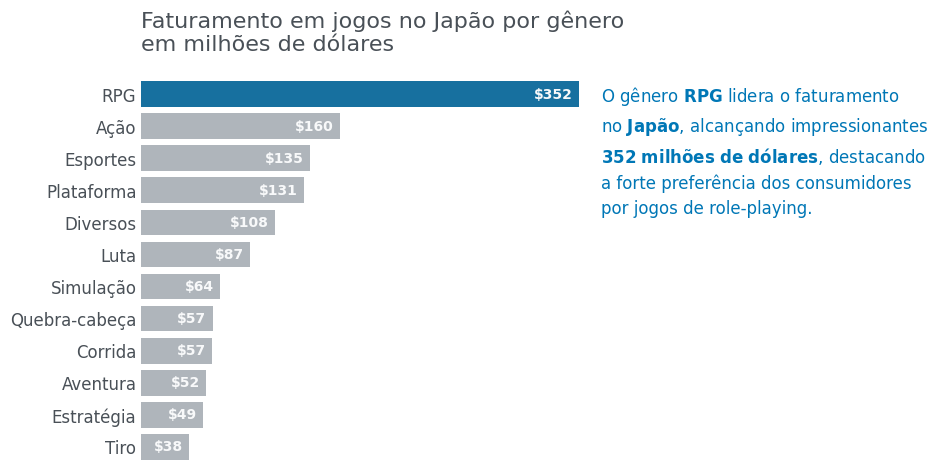

In [15]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Definindo as cores do gráfico
cores = [AZUL2 if vendas == vendas_genero_japao['vendas_japao'].max()
         else CINZA3 for vendas in vendas_genero_japao['vendas_japao']]

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao, hue='genero', palette=cores)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, color=CINZA2, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False)

# Removendo os ticks
ax.tick_params(length=0)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(vendas_genero_japao['vendas_japao']):
  qtd = f'${valor:.0f}' # Formatação para mostrar o valor inteiro com o símbolo de dólar
  offset = 5 # Deslocamento para evitar que o texto se sobreponha à barra
  ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

# Anotando uma conclusão no gráfico
ax.text(370, 4.5,
         'O gênero $\\bf{RPG}$ lidera o faturamento\n'
         'no $\\bf{Japão}$, alcançando impressionantes\n'
         '$\\bf{352}$ $\\bf{milhões}$ $\\bf{de}$ $\\bf{dólares}$, destacando\n'
         'a forte preferência dos consumidores\n'
         'por jogos de role-playing.\n',
         fontsize=12,
         linespacing=1.5,
         color=AZUL2)

plt.show()

> 👩‍💻***Dica da Val:*** Ao definir o tamanho da figura com `plt.subplots(figsize=(8,5))`, você pode adicionar um parâmetro chamado `dpi`, que significa *dots per inch* (pontos por polegada). Esse parâmetro controla a resolução da figura gerada. Por exemplo, ao definir `dpi=200`, a imagem será renderizada com uma resolução mais alta, o que resulta em uma visualização mais nítida e detalhada, especialmente útil se você planeja imprimir o gráfico ou incluí-lo em apresentações onde a qualidade visual é fundamental. Aumentar o dpi pode ser particularmente benéfico para garantir que todos os elementos gráficos, como texto e anotações, sejam claramente visíveis e legíveis.

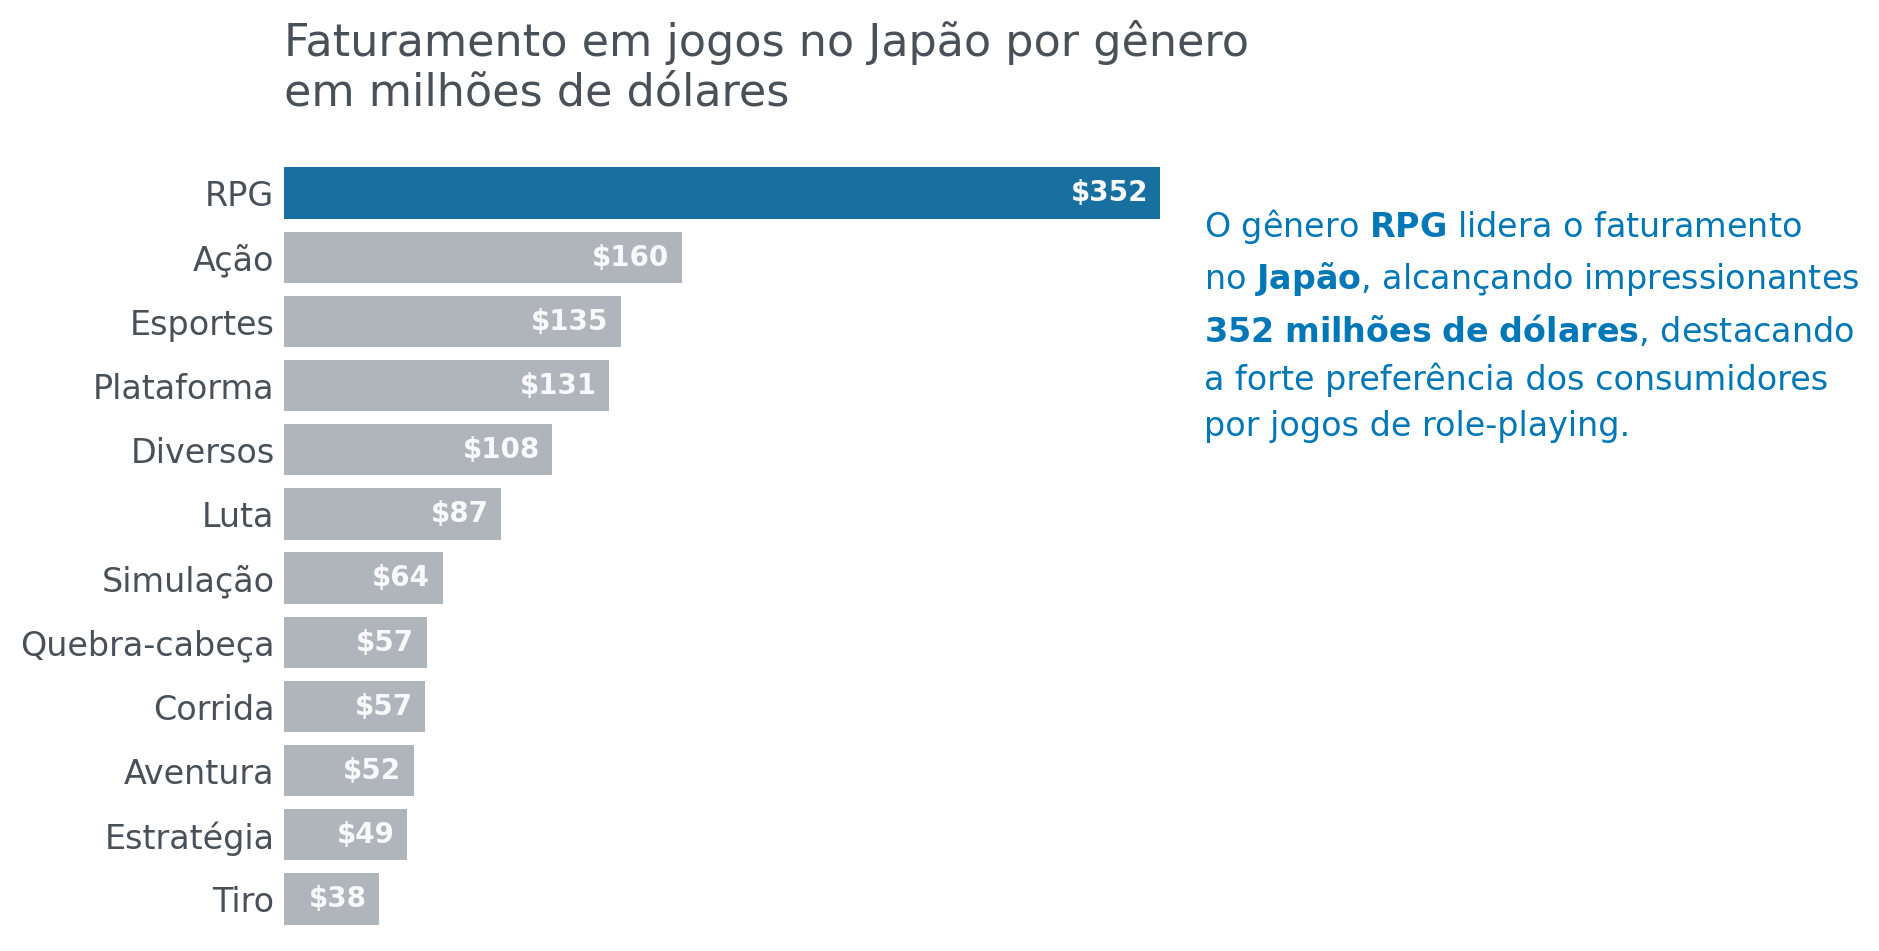

In [16]:
# Criando a figura e os eixos do gráfico com tamanho 8x5
fig, ax = plt.subplots(figsize=(8,5), dpi=200)

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Definindo as cores do gráfico
cores = [AZUL2 if vendas == vendas_genero_japao['vendas_japao'].max()
         else CINZA3 for vendas in vendas_genero_japao['vendas_japao']]

# Gerando o gráfico
ax = sns.barplot(y='genero', x='vendas_japao', data=vendas_genero_japao, hue='genero', palette=cores)

# Personalizando o gráfico
ax.set_title('Faturamento em jogos no Japão por gênero\nem milhões de dólares', pad=20, fontsize=16, color=CINZA2, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False)

# Removendo os ticks
ax.tick_params(length=0)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(vendas_genero_japao['vendas_japao']):
  qtd = f'${valor:.0f}' # Formatação para mostrar o valor inteiro com o símbolo de dólar
  offset = 5 # Deslocamento para evitar que o texto se sobreponha à barra
  ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

# Anotando uma conclusão no gráfico
ax.text(370, 4.5,
         'O gênero $\\bf{RPG}$ lidera o faturamento\n'
         'no $\\bf{Japão}$, alcançando impressionantes\n'
         '$\\bf{352}$ $\\bf{milhões}$ $\\bf{de}$ $\\bf{dólares}$, destacando\n'
         'a forte preferência dos consumidores\n'
         'por jogos de role-playing.\n',
         fontsize=12,
         linespacing=1.5,
         color=AZUL2)

plt.show()